<a href="https://colab.research.google.com/github/MeherBamrah/BuildWithAI_Week-3_Predictor-Model/blob/main/Package_Predictor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # Import pandas for data fragmentation
import numpy as np # To manupilate 3d arrays
import seaborn as sns # To visualize
import matplotlib.pyplot as plt # to visualize


In [6]:
df = pd.read_csv("/content/placement-dataset.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
x = df[["cgpa"]] # independent
y = df["package"]

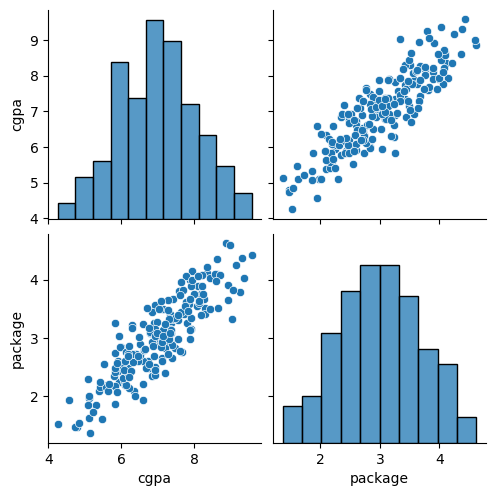

In [8]:
sns.pairplot(df, kind="scatter")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lm = LinearRegression()
lm.fit(x_train,y_train)
predictions = lm.predict(x_test)
mae = mean_absolute_error(y_test, predictions)
print(mae)

0.2606898249919377


In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(loss="epsilon_insensitive", epsilon=0)
epochs = 1000
learning_rate = 0.01
for epoch in range(epochs):
  lm.partial_fit(x_train, y_train)
  predictions = lm.predict(x_train)
  mae = mean_absolute_error(y_train, predictions)
  print(f"Epoch {epoch + 1}, MAE: {mae}")

Epoch 1, MAE: 0.34841698932661413
Epoch 2, MAE: 0.3968352915404732
Epoch 3, MAE: 0.36917369075589435
Epoch 4, MAE: 0.29956764953454107
Epoch 5, MAE: 0.29638292865226146
Epoch 6, MAE: 0.4425032930050181
Epoch 7, MAE: 0.29391032309753057
Epoch 8, MAE: 0.29450335427089885
Epoch 9, MAE: 0.30757230608379493
Epoch 10, MAE: 0.3237712219125757
Epoch 11, MAE: 0.36805568411526063
Epoch 12, MAE: 0.32056281183298047
Epoch 13, MAE: 0.29676772223080017
Epoch 14, MAE: 0.29122178730916287
Epoch 15, MAE: 0.290134346900369
Epoch 16, MAE: 0.3022365200136504
Epoch 17, MAE: 0.3466511959411677
Epoch 18, MAE: 0.35433906117463554
Epoch 19, MAE: 0.28805865518789164
Epoch 20, MAE: 0.3112370855273704
Epoch 21, MAE: 0.3058068163249968
Epoch 22, MAE: 0.3053520189128719
Epoch 23, MAE: 0.31514563821122854
Epoch 24, MAE: 0.29010530664569456
Epoch 25, MAE: 0.29530864878648955
Epoch 26, MAE: 0.3014811649705556
Epoch 27, MAE: 0.28317958231568624
Epoch 28, MAE: 0.28277127894454274
Epoch 29, MAE: 0.2827305414797439
Epoch 

In [13]:
import joblib
joblib.dump(lm, "model.pkl")

['model.pkl']